In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_loader import DataLoader

sns.set_theme()
sns.set_palette('deep')

DATA_PATH = "./data/all_hourly_data.h5"
data_loader = DataLoader(data_path=DATA_PATH)

In [2]:
# plot missing rates
df = data_loader.data_meas

In [3]:
features = list(df.drop(columns=["hadm_id", "subject_id", "hours_in", "icustay_id"]).columns)

In [4]:
sampling_intervals = [2,4,6]

In [5]:
df_6 = df
df_6["sample_index"] = df_6.groupby(["subject_id"]).cumcount()//6

In [7]:
df_6 = df_6.groupby(["subject_id", "sample_index"]).mean().reset_index()

In [8]:
df_6

LEVEL2,subject_id,sample_index,hadm_id,icustay_id,hours_in,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,...,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine,ph,ph urine
0,3,0,145834.0,211552.0,2.5,25.0,1.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.842857,NaN,7.316667,5.0
1,3,1,145834.0,211552.0,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.400000,35.0,7.315000,5.0
2,3,2,145834.0,211552.0,14.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.398750,5.0
3,3,3,145834.0,211552.0,20.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,106.00000,18.800000,NaN,7.371250,NaN
4,3,4,145834.0,211552.0,26.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,7.407250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381293,99999,0,113369.0,246512.0,2.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,96.39883,12.400000,NaN,NaN,NaN
381294,99999,1,113369.0,246512.0,8.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381295,99999,2,113369.0,246512.0,14.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.300000,NaN,NaN,NaN
381296,99999,3,113369.0,246512.0,20.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#TODO calculate for multiple sampling intervals and display 

df_missing_none = (df[features].isna().sum()/len(df)).reset_index(name="missing_rate_none")
df_missing_6 = (df_6[features].isna().sum()/len(df_6)).reset_index(name="missing_rate_6")

In [48]:
df_plot = df_missing_6.merge(df_missing_none)

In [49]:
df_plot

,LEVEL2,missing_rate_6,missing_rate_none
0,alanine aminotransferase,0.911678,0.980273
1,albumin,0.939444,0.986978
2,albumin ascites,0.999701,0.999948
3,albumin pleural,0.999617,0.999934
4,albumin urine,0.999656,0.999940
...,...,...,...
99,weight,0.855452,0.971895
100,white blood cell count,0.654027,0.918743
101,white blood cell count urine,0.985555,0.997467
102,ph,0.715141,0.908618


In [50]:
df_plot = df_plot.sort_values("missing_rate_none").reset_index().drop(columns=["index"])

In [51]:
df_plot

,LEVEL2,missing_rate_6,missing_rate_none
0,heart rate,0.044202,0.104139
1,respiratory rate,0.050787,0.118358
2,systolic blood pressure,0.047252,0.132583
3,diastolic blood pressure,0.047325,0.132797
4,mean blood pressure,0.050242,0.137121
...,...,...,...
99,albumin ascites,0.999701,0.999948
100,creatinine ascites,0.999832,0.999971
101,lymphocytes atypical csl,0.999890,0.999981
102,creatinine pleural,0.999892,0.999981


<AxesSubplot:>

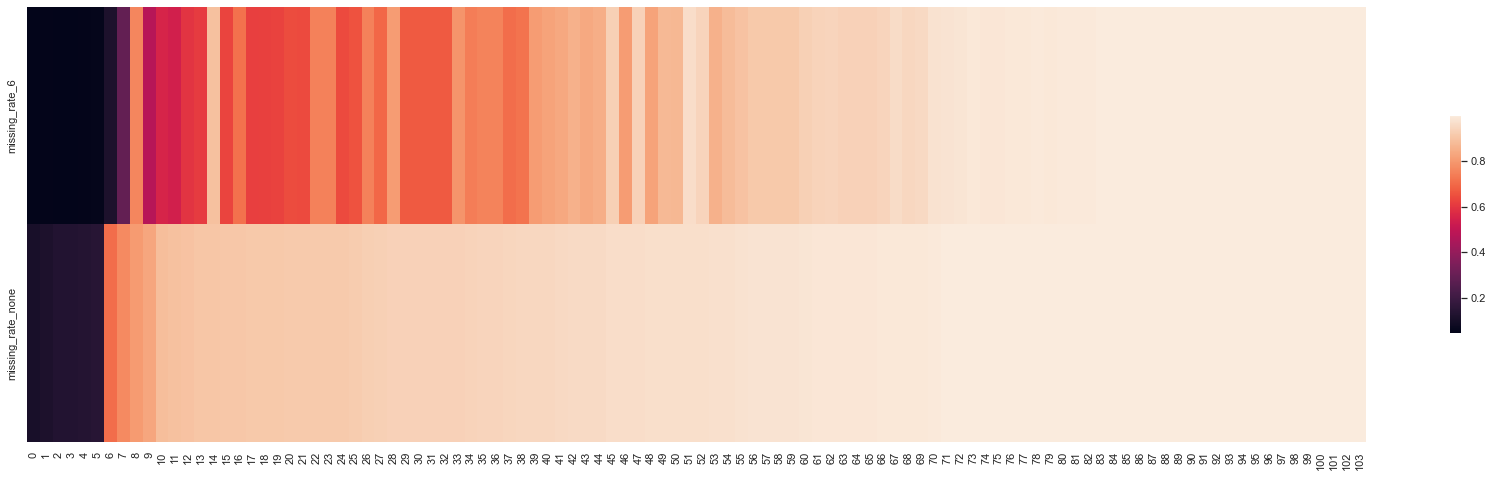

In [52]:
fig, ax = plt.subplots(figsize=(30,8))
sns.heatmap(df_plot.drop(columns="LEVEL2").T, ax=ax, cbar_kws={"shrink": 0.5})

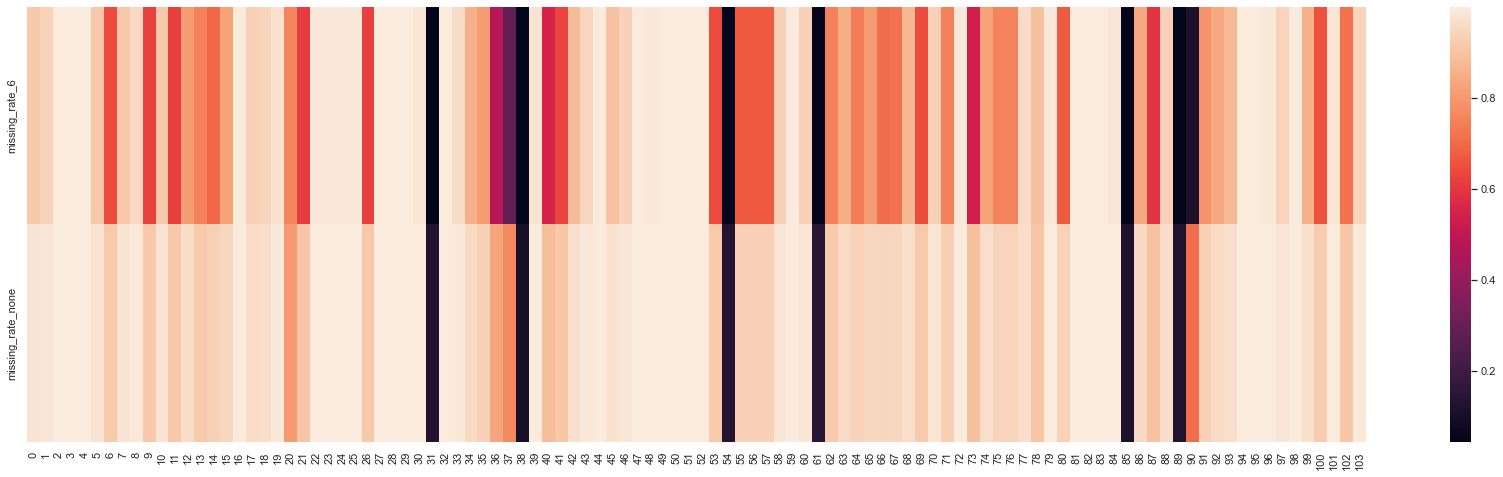

In [31]:
fig